Akbar Abdurakhmonov </br>
Assignment #4

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly

# 1.Generate 100 samples of fake data

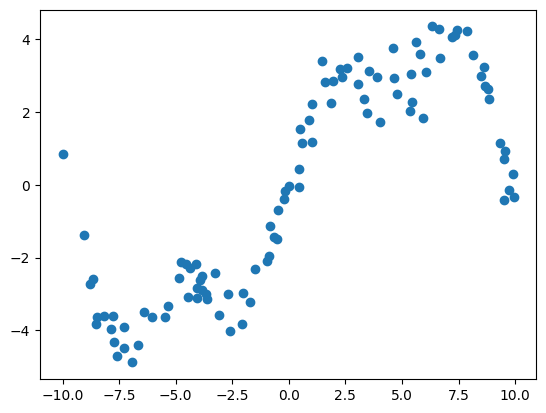

In [65]:
N = 100  
x = 20 * np.random.rand(N) - 10  
y = np.sin(x) - 0.01*(x**3) +x

y += np.random.normal(0, 0.5, N)

plt.scatter(x,y)
plt.show()

# 2.Split the data into three subsets

In [66]:
from sklearn.model_selection import train_test_split

# first take 70% as training data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

# now split the remaining data in half
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size=0.5)  

#Check the length of each x-array
print("x_train:", len(x_train))
print("x_val:", len(x_val))
print("x_test:", len(x_test))

x_train: 70
x_val: 15
x_test: 15


# 3.Create a function named ‘rmse’

In [67]:
def rmse(y, y_hat):
    return np.sqrt(np.mean((y - y_hat) ** 2))
    

# 4.Using a for loop to fit polynomials of degree 0 to 19

In [68]:
degrees = range(20)
p = []
rmse_train = []
rmse_val = []
for degree in degrees:
    w = poly.polyfit(x_train, y_train, degree) 
    p.append(poly.Polynomial(w))  
    rmse_train.append(rmse(y_train, p[degree](x_train)))
    rmse_val.append(rmse(y_val, p[degree](x_val)))

# 5.Create a model complexity graph

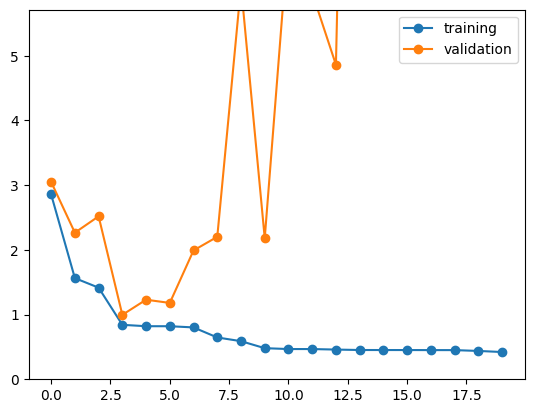

In [69]:
plt.plot(degrees, rmse_train, marker='o')
plt.plot(degrees, rmse_val, marker='o')
plt.ylim([0, min(max(rmse_train)*2,max(rmse_val))])
plt.legend(['training', 'validation'])
plt.show()

# 6.Choose which polynomial fits best:

### Best degree is 3. 
### The RMSE values for this degree show a good balance between training and validation. Model in this point is not too complex or too simple.

# 7.Use your selected model to calculate and display the RMSE of predictions on the test data

training rmse = 0.841764158091802
validation rmse = 0.9957819399019843
testing rmse = 1.0456521147962372


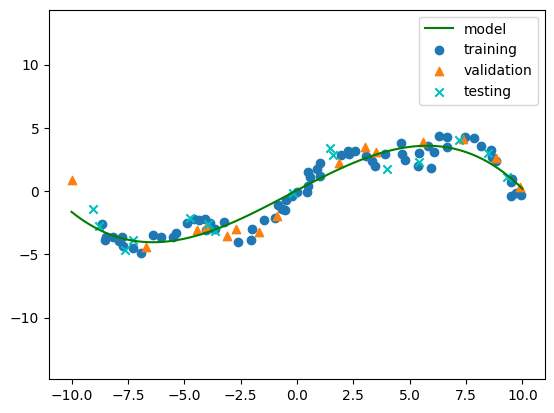

In [78]:
# choose the degree below to plot one of the models
degree = 3

print('training rmse =', rmse(y_train, p[degree](x_train)))
print('validation rmse =', rmse(y_val, p[degree](x_val)))
print('testing rmse =', rmse(y_test, p[degree](x_test)))

# create an x-lattice of 100 evenly spaced points from -5 to 5  for plotting
x_lat = np.linspace(-10, 10, 100)

# plot the polynomial along with the data
plt.plot(x_lat, p[degree](x_lat), color='g')
plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val, marker='^')
plt.scatter(x_test,y_test, marker='x', color='c')
plt.ylim([min(y)-10, max(y)+10])
plt.legend(['model', 'training', 'validation', 'testing'])
plt.show()